In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Bad key "lines.markerfacecolor" on line 11 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.markeredgecolor" on line 12 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("data/diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Q1 . Facet and color

<IPython.core.display.Javascript object>


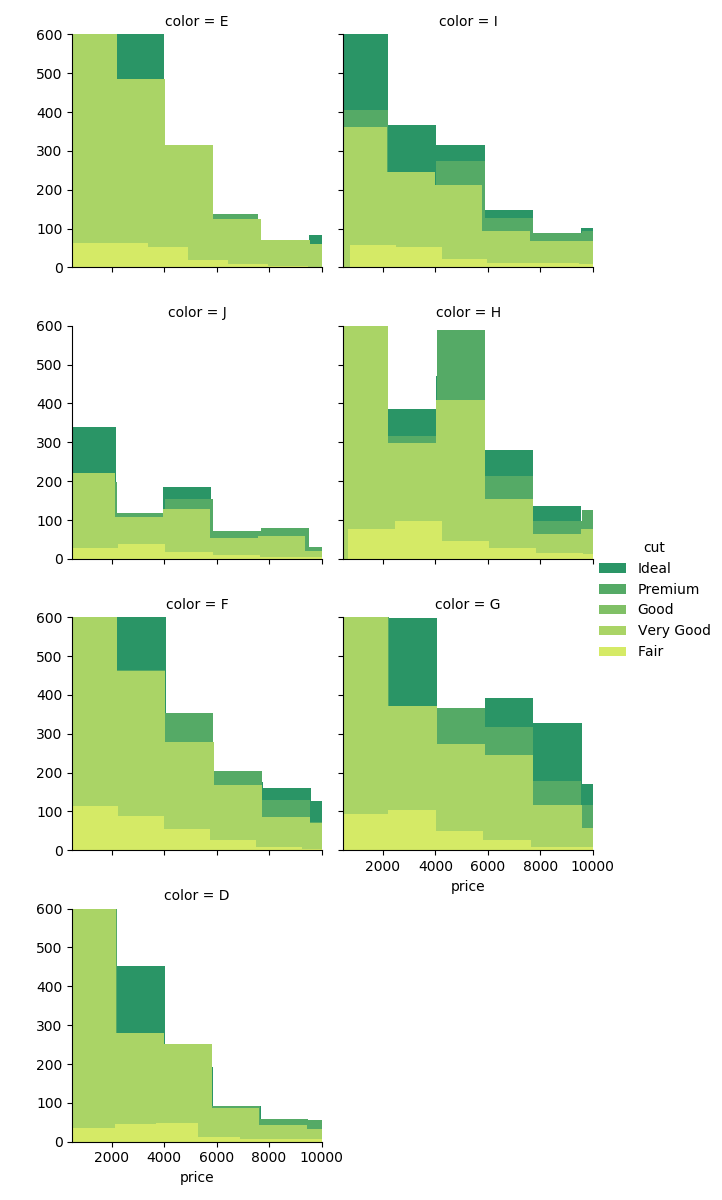

In [4]:
g = sns.FacetGrid(col="color" , hue="cut",palette="summer" , col_wrap=2 , data=df)
g.map(plt.hist , "price").add_legend()
g.set(xlim=(500 ,10000))
g.set(ylim=(0 ,600))



# Q2 . Table vs price

In [5]:
plt.figure()
sns.scatterplot(x="table" ,y="price" , hue="cut" , data=df  , )
plt.xlim(xmin=40 , xmax=80)
plt.xticks(np.arange(40, 80 ,step=2) , rotation="vertical")
plt.ylim(ymin=40 , ymax=5000)

plt.show()

<IPython.core.display.Javascript object>

# Typical table value ([ideal , premium] , [range])

In [13]:
df.loc[df["cut"] =="Ideal"].table.describe()

count    21551.000000
mean        55.951668
std          1.246423
min         43.000000
25%         55.000000
50%         56.000000
75%         57.000000
max         63.000000
Name: table, dtype: float64

In [14]:
df.loc[df["cut"] =="Premium"].table.describe()

count    13791.000000
mean        58.746095
std          1.478573
min         51.000000
25%         58.000000
50%         59.000000
75%         60.000000
max         62.000000
Name: table, dtype: float64

# Price vs volume and diamond clarity

In [15]:
df["volume"] = df.apply(lambda x:(x['x'] *x["y"] *x["z"]) , axis=1).astype(np.double)

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [20]:
df["volume_scaled"] = df.apply(lambda x: np.log10(x["volume"]) , axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,volume_scaled
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1.582086
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1.537893
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1.580661
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,1.669545
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,1.715312


<IPython.core.display.Javascript object>


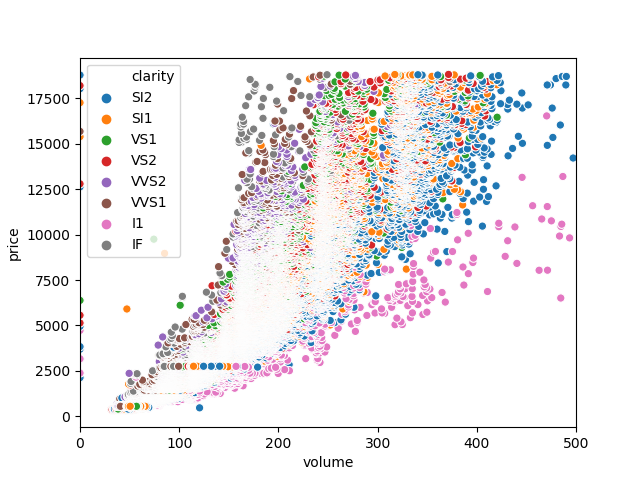

In [19]:
plt.figure()
sns.scatterplot(x="volume" , y="price" , hue="clarity" , data=df)
plt.xlim(xmin=0 , xmax=500)
plt.show()

<IPython.core.display.Javascript object>


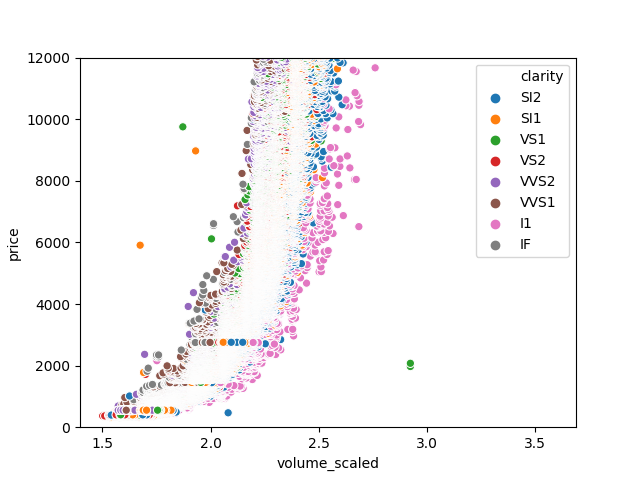

In [21]:
plt.figure()
sns.scatterplot(x="volume_scaled" , y="price" , hue="clarity" , data=df)
plt.ylim(0 , 12000)
plt.show()

# Q5 proportion of friendships initialed

In [22]:
df = pd.read_csv("data/pseudo_facebook.tsv" , sep="\t")

In [23]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [24]:
df["friend_count"]

0           0
1           0
2           0
3           0
4           0
         ... 
98998    2118
98999    1968
99000    2002
99001    2560
99002    2049
Name: friend_count, Length: 99003, dtype: int64

In [25]:
df["friendships_initiated"]

0           0
1           0
2           0
3           0
4           0
         ... 
98998     341
98999    1720
99000    1524
99001     185
99002     768
Name: friendships_initiated, Length: 99003, dtype: int64

In [67]:
# solution
df["prop_initiated"] =df["friendships_initiated"] /df["friendships_initiated"].sum() 

In [68]:
# im not sure with solution
df["prop_initiated"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
98998    0.000199
98999    0.000185
99000    0.000188
99001    0.000241
99002    0.000193
Name: prop_initiated, Length: 99003, dtype: float64

<IPython.core.display.Javascript object>


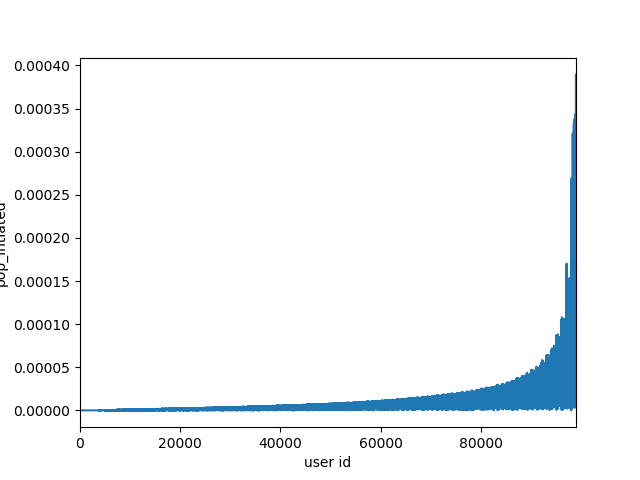

In [59]:
plt.figure()
df.prop_initiated.plot()
plt.xlabel("user id")
plt.ylabel("pop_intiated")
plt.show()

<IPython.core.display.Javascript object>


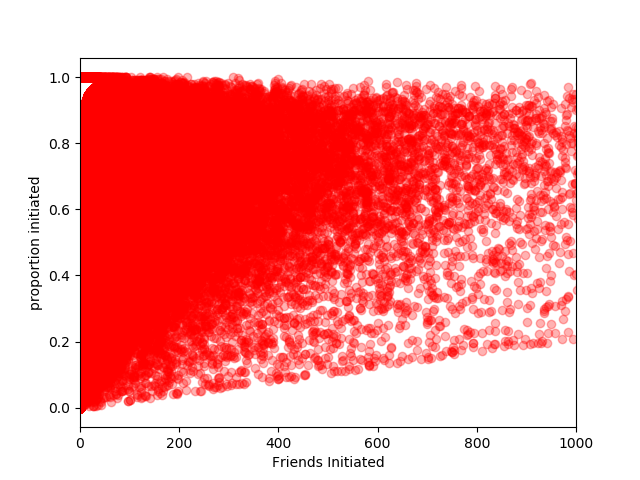

In [49]:
plt.figure()
plt.scatter(df.friendships_initiated , df.prop_initiated , color="r" , alpha=0.3)
plt.xlabel("Friends Initiated")
plt.ylabel("proportion initiated")
plt.xlim(0,1000)
plt.show()

<IPython.core.display.Javascript object>


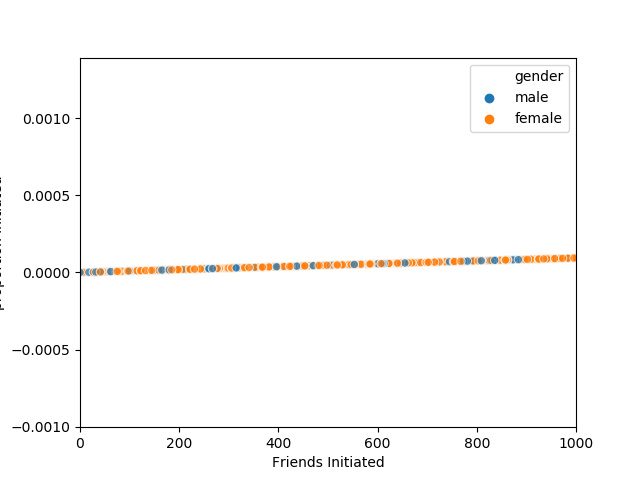

In [60]:
plt.figure()
sns.scatterplot(x=df.friendships_initiated , y=df.prop_initiated , hue=df.gender , alpha=0.7)
plt.xlabel("Friends Initiated")
plt.ylabel("proportion initiated")
plt.xlim(0,1000)
plt.show()

# Q6 Prop vs tenure

In [61]:
df["year_joined"] = 2014 - round(df.tenure / 365)

In [62]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,prop_initiated,year_joined,year_cut
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.0,2013.0,"(2012, 2014]"
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,0.0,2014.0,"(2012, 2014]"
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,0.0,2014.0,"(2012, 2014]"
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,0.0,2014.0,"(2012, 2014]"
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,0.0,2014.0,"(2012, 2014]"


In [63]:
df["year_cut"] = pd.cut(df.year_joined , [2004 , 2009 , 2011 ,2012 , 2014])

In [64]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,prop_initiated,year_joined,year_cut
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.0,2013.0,"(2012, 2014]"
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,0.0,2014.0,"(2012, 2014]"
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,0.0,2014.0,"(2012, 2014]"
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,0.0,2014.0,"(2012, 2014]"
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,0.0,2014.0,"(2012, 2014]"


<IPython.core.display.Javascript object>


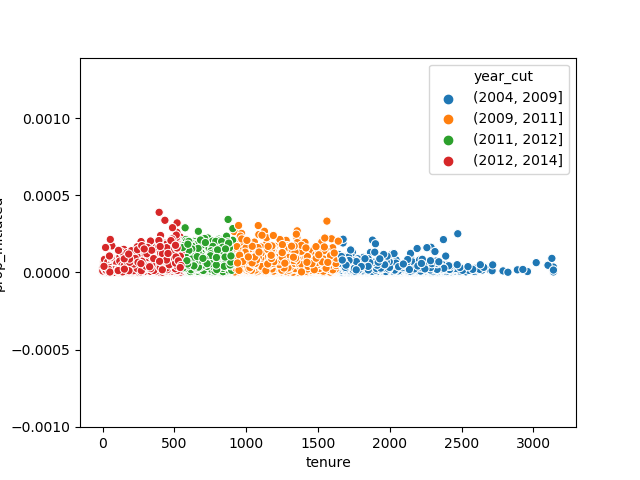

In [66]:
plt.figure()
sns.scatterplot(x="tenure" , y="prop_initiated" , hue="year_cut" , data=df)
plt.show()

In [111]:
df_fc = df.groupby("friend_count")["tenure","friendships_initiated" , "year_cut" ,"year_joined"]

In [129]:
df_fc.

AttributeError: Cannot access callable attribute 'unstack' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [126]:
df_fc.apply(lambda x: x["friendships_initiated"] / x["friendships_initiated"])

TypeError: Series.name must be a hashable type